# **Experiment 9: Image Segmentation**
Design and implement an image segmentation framework using both classical (thresholding, region
based) and learning-based approaches. Compare their performance on natural images.

Otsu's Thresholding Result:


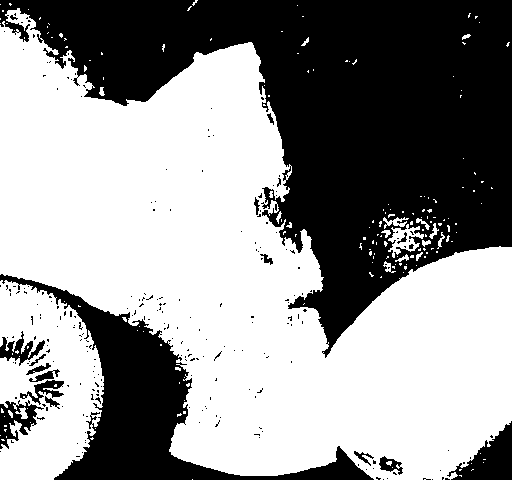

Watershed Segmentation Result:


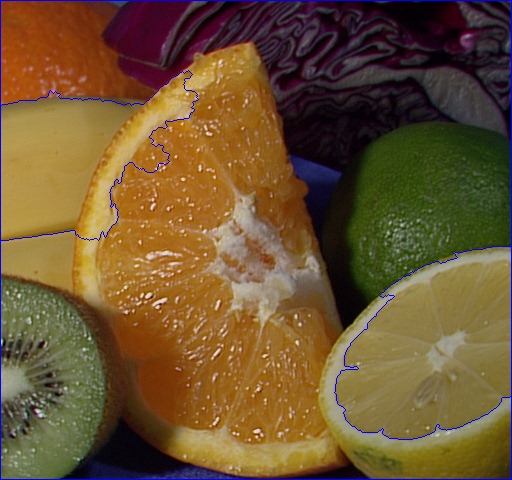

K-Means (Learning-based) Result:


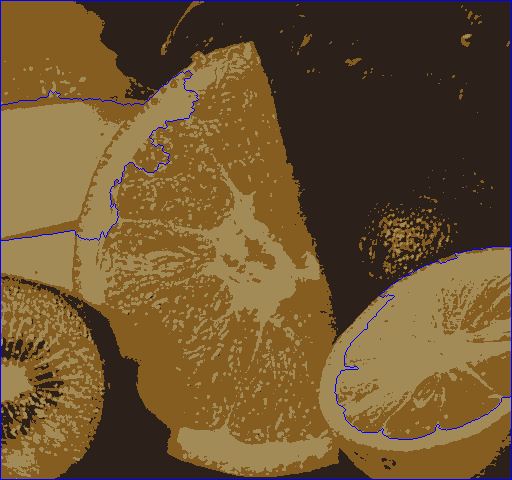

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load a natural image
!wget -q -O nature.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg
img = cv2.imread('nature.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Otsu's Thresholding (Automatically calculates optimal threshold)
ret, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

print("Otsu's Thresholding Result:")
cv2_imshow(thresh_otsu)


# Noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh_otsu, cv2.MORPH_OPEN, kernel, iterations=2)

# Finding sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area (Distance Transform)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Apply Watershed
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0] # Mark boundaries in Blue

print("Watershed Segmentation Result:")
cv2_imshow(img)

# Reshape the image to a 2D array of pixels (RGB)
data = img.reshape((-1, 3))
data = np.float32(data)

# Define criteria and apply K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4 # Segment into 4 main colors/regions
ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 and reshape to original image
center = np.uint8(center)
res = center[label.flatten()]
segmented_kmeans = res.reshape((img.shape))

print("K-Means (Learning-based) Result:")
cv2_imshow(segmented_kmeans)